In [1]:
import pandas as pd  # Import the pandas library

# Load the dataset
df = pd.read_csv('Crop_recommendation.csv')

# Display the first few rows of the dataset
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [2]:
df.info()  # Gives an overview of the dataset's columns and data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [3]:
# Count missing values in each column
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Display only columns with missing values


Series([], dtype: int64)


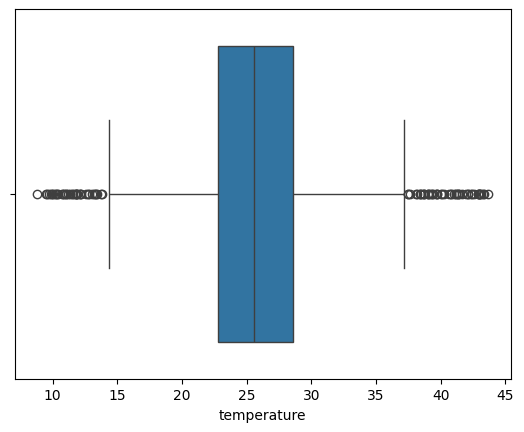

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example of a boxplot for visualizing outliers in a numeric column
sns.boxplot(x=df['temperature'])
plt.show()


In [5]:
Q1 = df['temperature'].quantile(0.25)
Q3 = df['temperature'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['temperature'] < (Q1 - 1.5 * IQR)) | (df['temperature'] > (Q3 + 1.5 * IQR))]
print(outliers)


       N    P    K  temperature   humidity        ph    rainfall   label
1203  36  125  196    37.465668  80.659687  6.155261   66.838723  grapes
1205   2  123  198    39.648519  82.210799  6.253035   70.399061  grapes
1207  11  122  195    12.141907  83.568125  5.647202   69.631220  grapes
1208   6  123  203    12.756796  81.624974  6.130310   66.778446  grapes
1209  17  134  204    39.040720  80.183933  6.499605   73.884670  grapes
...   ..  ...  ...          ...        ...       ...         ...     ...
1786  69   66   49    40.004391  90.170158  6.527110   92.118774  papaya
1791  56   65   45    38.201682  93.973800  6.751299  218.090881  papaya
1795  42   59   55    40.102077  94.351102  6.979102  149.119999  papaya
1796  43   64   47    38.589545  91.580765  6.825665  102.270823  papaya
1797  35   67   49    41.313301  91.150880  6.617067  239.742755  papaya

[86 rows x 8 columns]


In [7]:
df.info()         # Overview of dataset columns
df.isnull().sum() # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

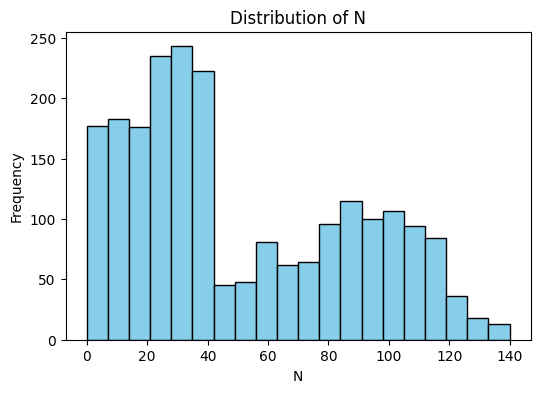

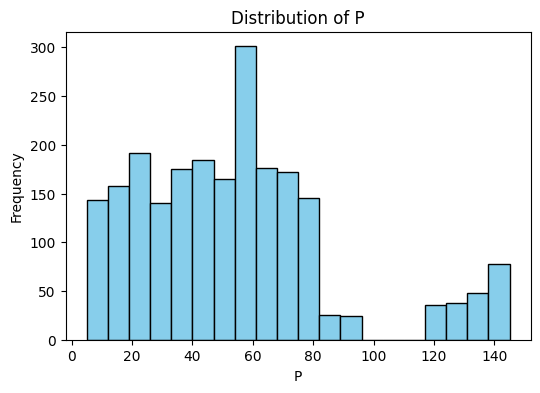

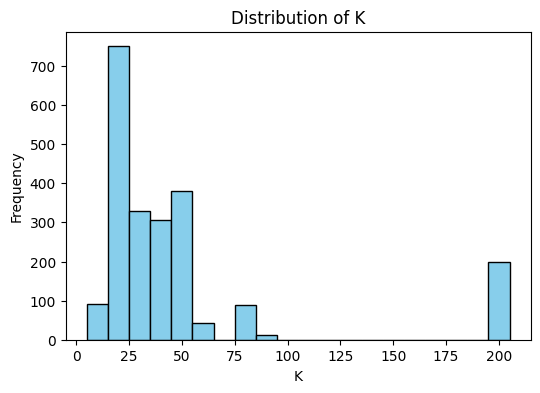

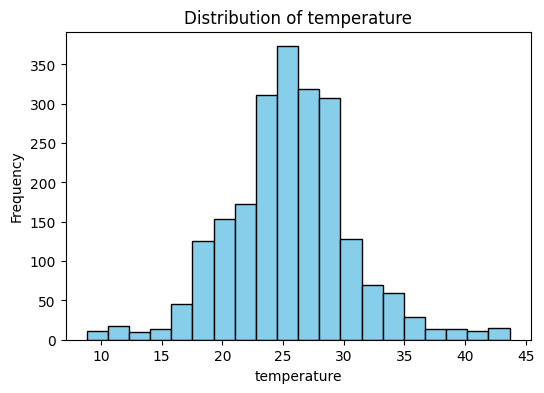

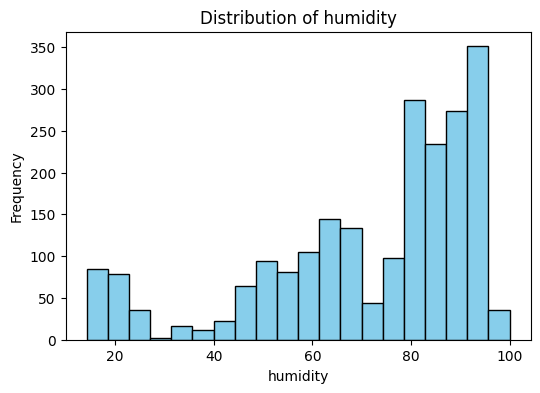

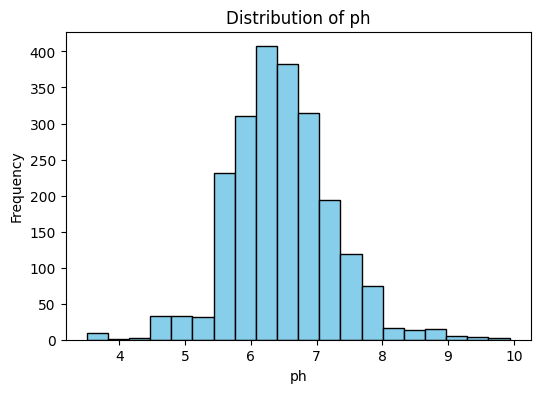

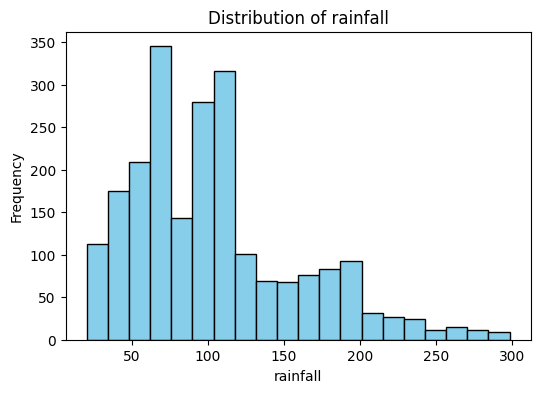

In [8]:
import matplotlib.pyplot as plt

# Loop through each column to create histograms
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for feature in features:
    plt.figure(figsize=(6, 4))
    plt.hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


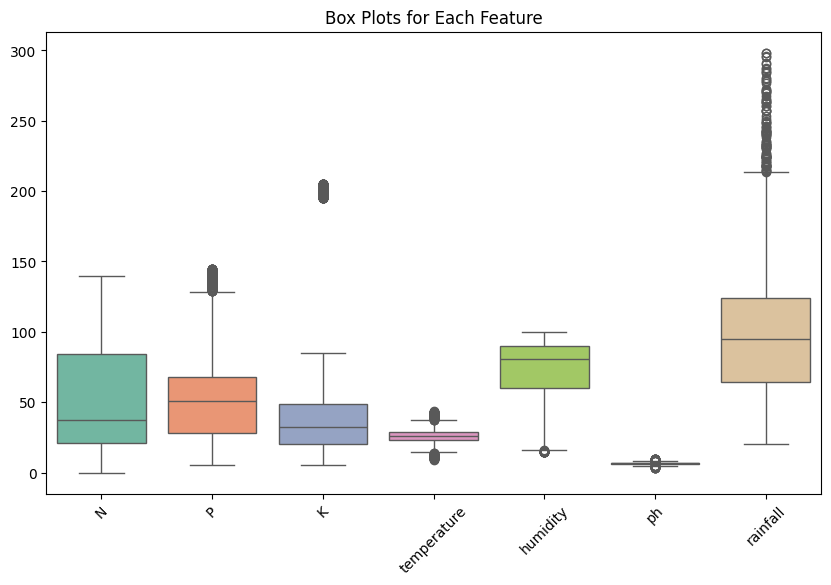

In [9]:
import seaborn as sns

# Plot a box plot for each feature to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[features], palette="Set2")
plt.title("Box Plots for Each Feature")
plt.xticks(rotation=45)
plt.show()


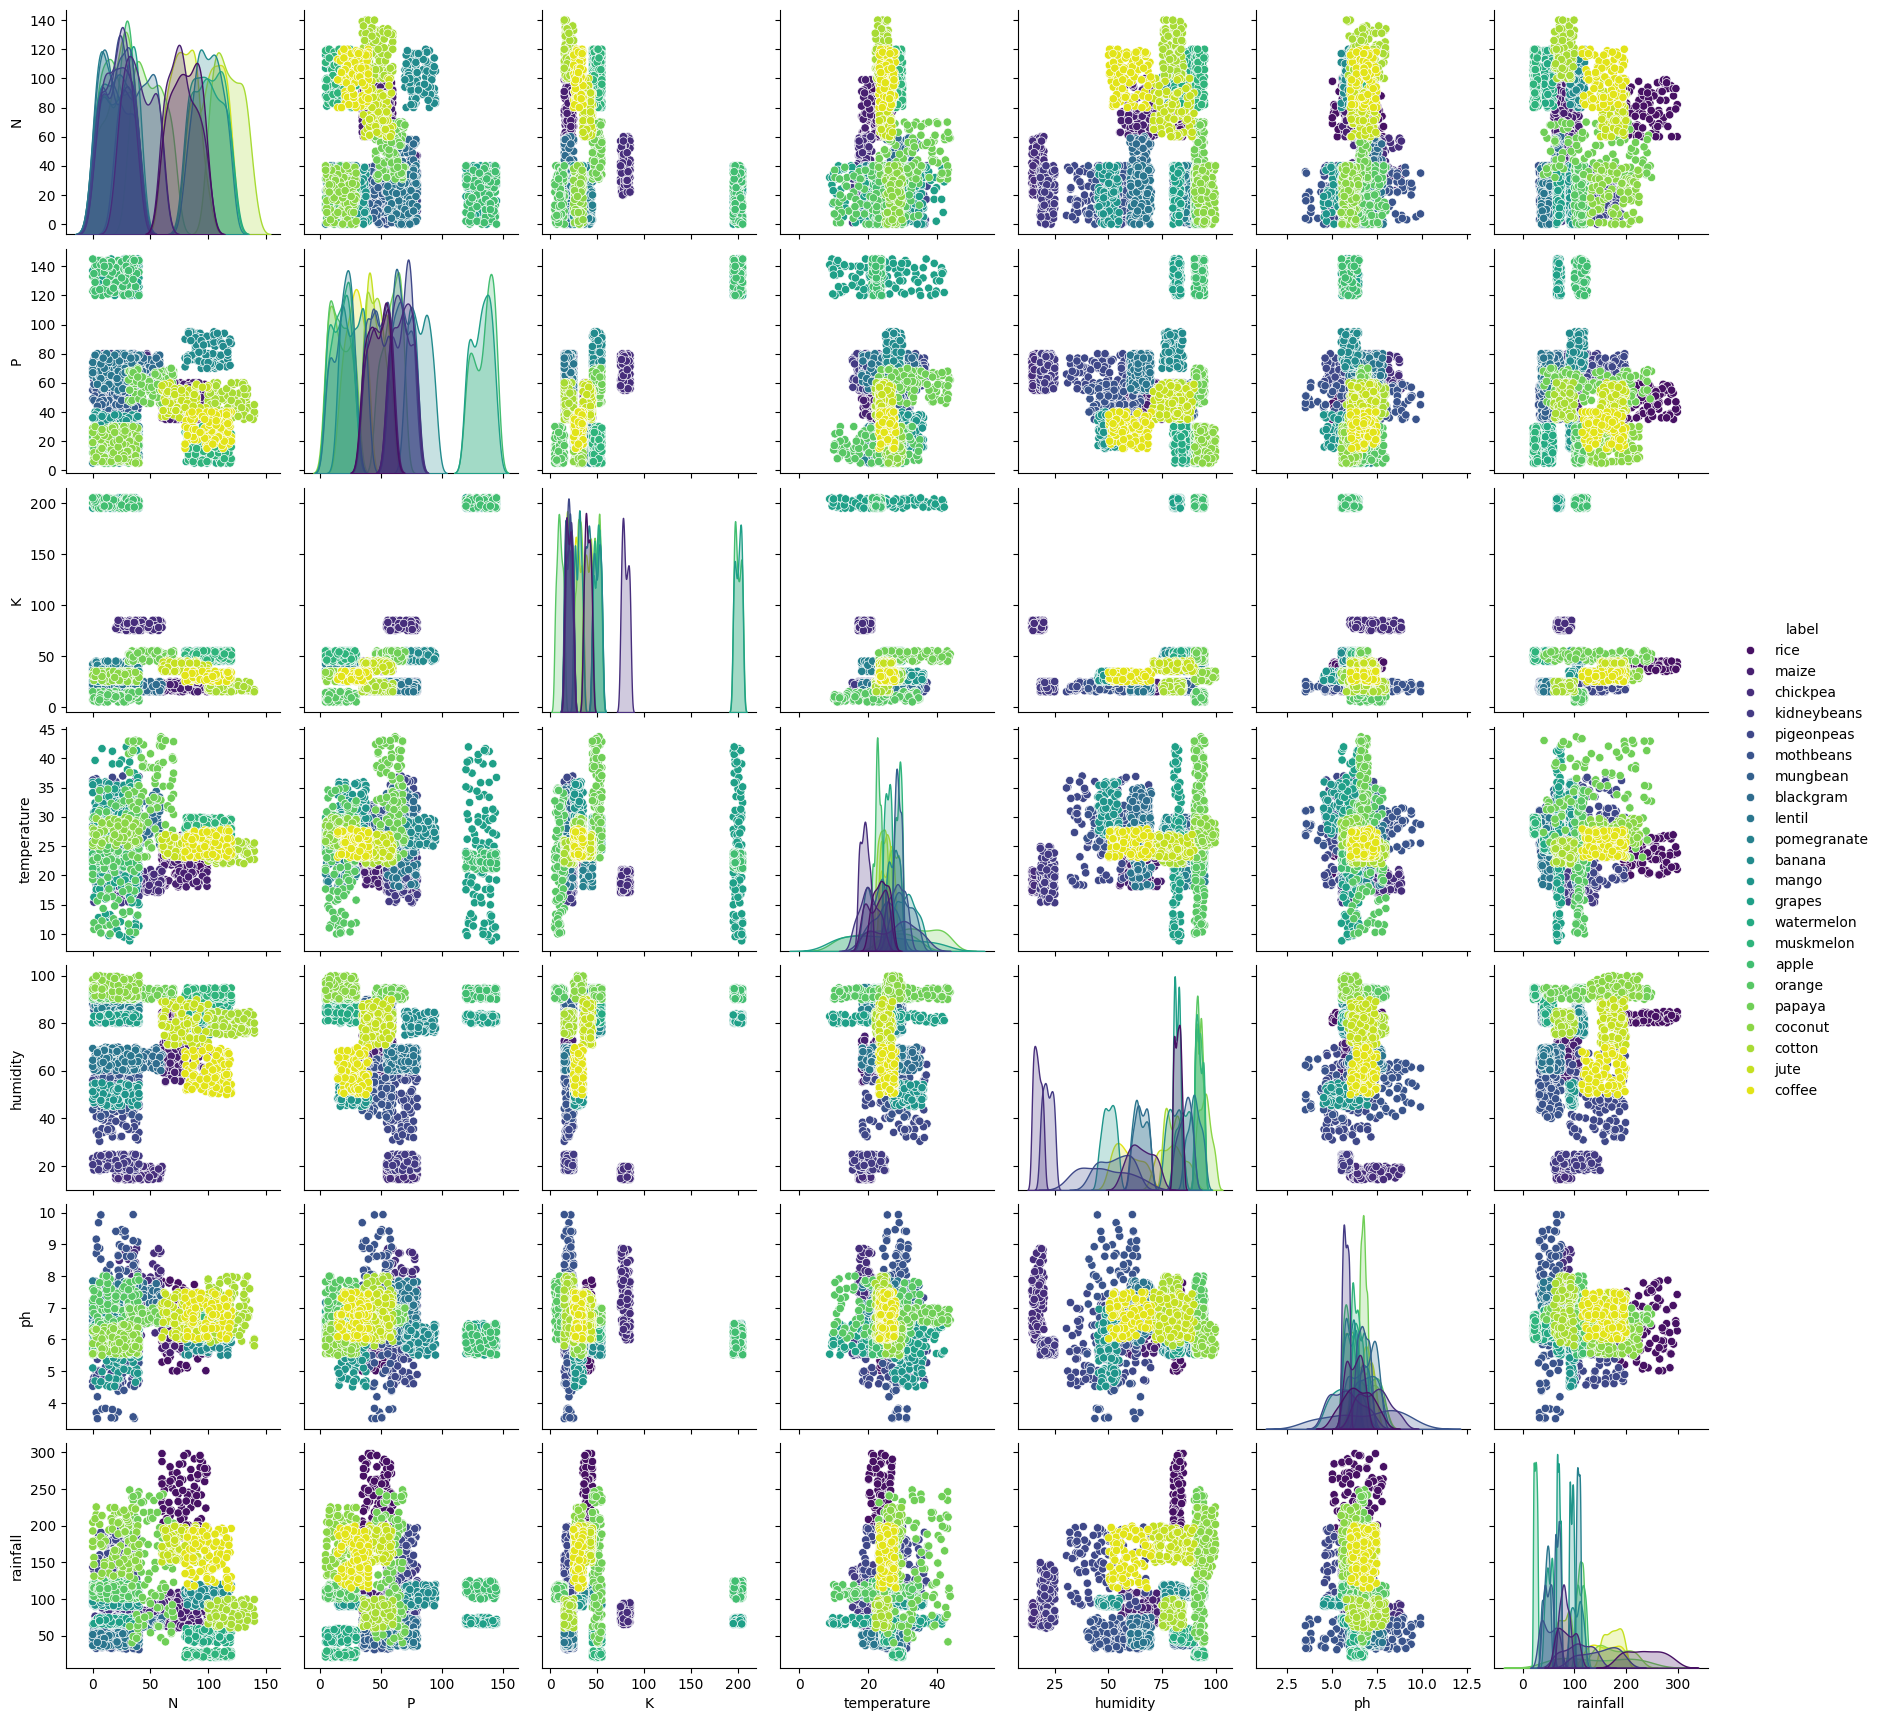

In [10]:
import seaborn as sns

# Create pair plot to examine relationships between pairs of features
sns.pairplot(df, hue='label', palette="viridis")
plt.show()


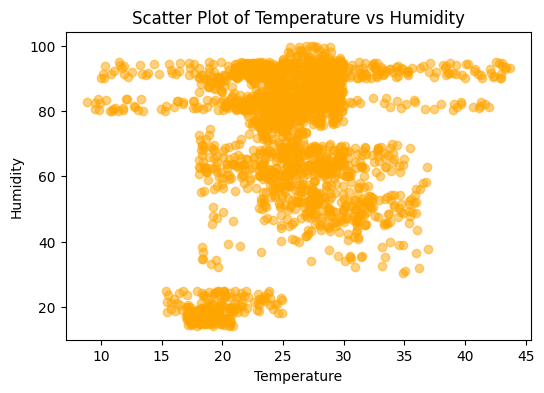

In [12]:
import matplotlib.pyplot as plt

# Example scatter plot between 'temperature' and 'humidity'
plt.figure(figsize=(6, 4))
plt.scatter(df['temperature'], df['humidity'], alpha=0.5, c='orange')
plt.title("Scatter Plot of Temperature vs Humidity")
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.show()


In [13]:
# Define the input features (X) and the target label (y)
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']


In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)


Training set size: (1760, 7) (1760,)
Testing set size: (440, 7) (440,)


In [23]:
from sklearn.tree import DecisionTreeClassifier


In [24]:
model = DecisionTreeClassifier(max_depth=10, random_state=42)


In [25]:
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, random_state=42)

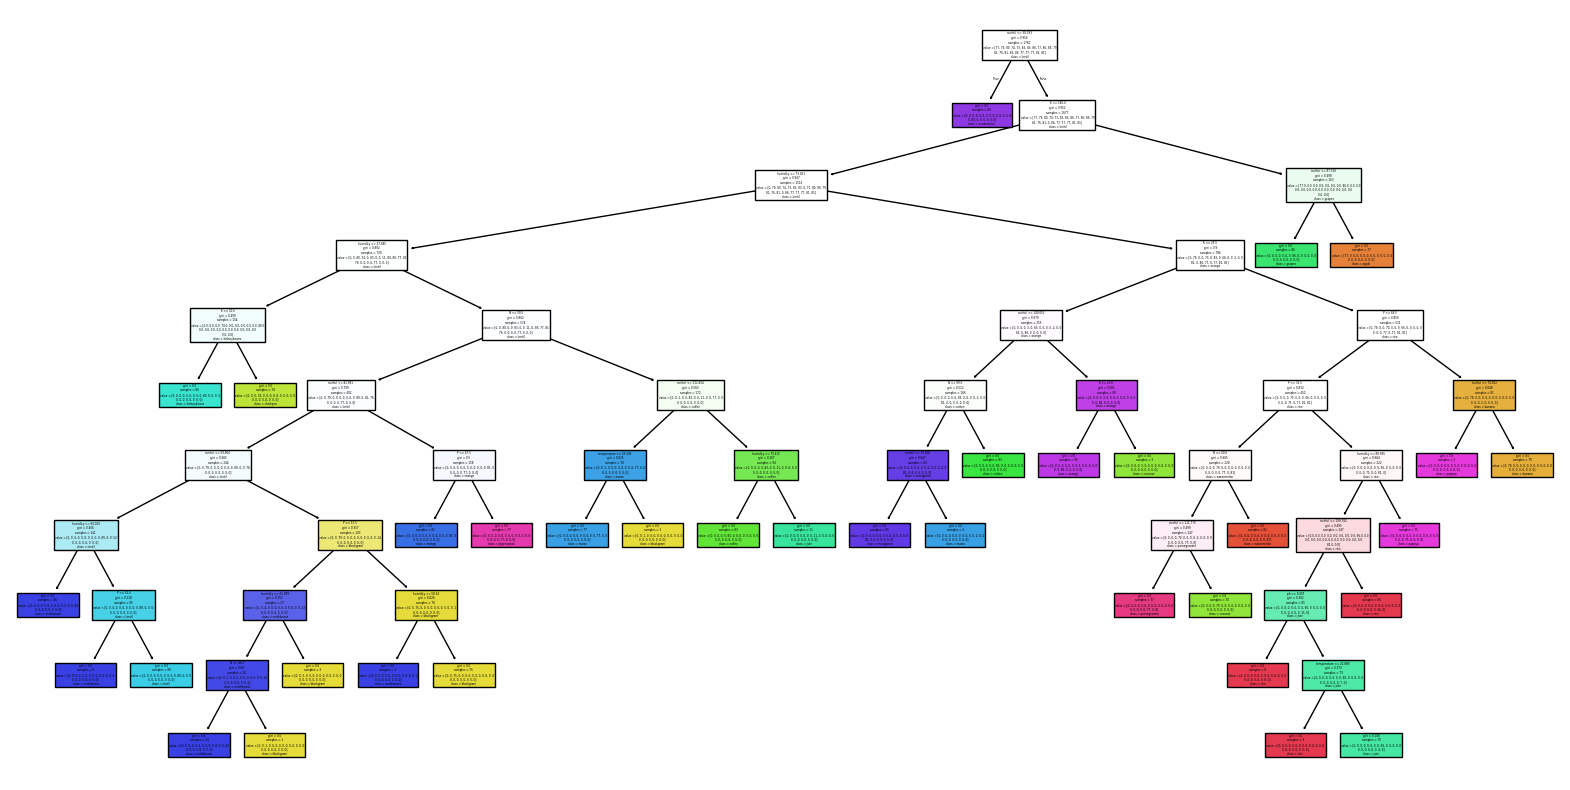

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=model.classes_)
plt.show()


In [27]:
y_pred = model.predict(X_test)


In [28]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 98.64%


In [29]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision * 100:.2f}%')


Precision: 98.68%


In [30]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall * 100:.2f}%')


Recall: 98.64%


In [31]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1 * 100:.2f}%')


F1 Score: 98.63%


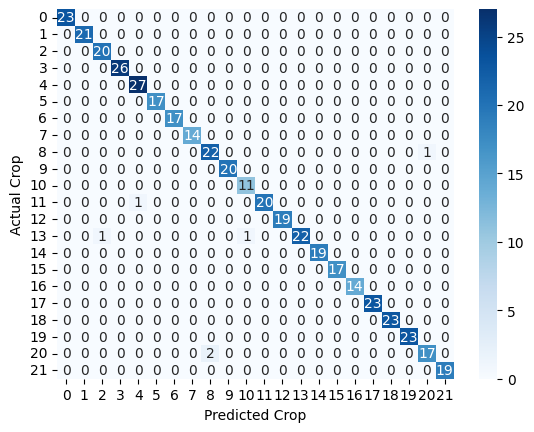

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Crop")
plt.ylabel("Actual Crop")
plt.show()


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Adjust hyperparameters like n_estimators and max_depth
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy with Tuning: {accuracy_rf * 100:.2f}%')


Random Forest Accuracy with Tuning: 99.32%


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with RandomForestClassifier
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Output the best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_ * 100)


Best Parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 99.54545454545455


In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV with SVC (Support Vector Classifier)
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Output the best parameters and accuracy
print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("Best SVM Accuracy:", grid_search_svm.best_score_ * 100)


Best Parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM Accuracy: 98.63636363636363


In [36]:
!pip install streamlit
!pip install scikit-learn pandas matplotlib seaborn


   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   -------------- ------------------------- 3.1/8.6 MB 17.6 MB/s eta 0:00:01
   ------------------------------- -------- 6.8/8.6 MB 17.8 MB/s eta 0:00:01
   ---------------------------------------- 8.6/8.6 MB 15.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/658.1 kB ? eta -:--:--
   ---------------------------------------- 658.1/658.1 kB 8.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
   ----- ---------------------------------- 3.4/25.1 MB 18.1 MB/s eta 0:00:02
   ---------- ----------------------------- 6.3/25.1 MB 18.1 MB/s eta 0:00:02
   ---------------- ----------------------- 10.5/25.1 MB 17.1 MB/s eta 0:00:01
   ---------------------- ----------------- 14.2/25.1 MB 17.4 MB/s eta 0:00:01
   ---------------------------- ----------- 17.8/25.1 MB 17.6 MB/s eta 0:00:01
   ---------------------------------- ----- 21.8/25.1 MB 17.6 MB/s eta 0:00:01
   ----


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Darbin Rawal\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Darbin Rawal\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [39]:
!pip list

Package                   Version
------------------------- --------------
altair                    5.4.1
anyio                     4.6.2.post1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
blinker                   1.9.0
cachetools                5.5.0
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.4.0
click                     8.1.7
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.0
cycler                    0.12.1
debugpy                   1.8.8
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.1.0
fastjsonschema            2.20.0
fonttools                 4.54.1
fqdn                      1.5.1
gitdb     

In [40]:
!pip install --upgrade streamlit scikit-learn pandas matplotlib seaborn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Darbin Rawal\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [41]:
import streamlit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [42]:
!pip install joblib



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Darbin Rawal\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [43]:
import joblib
# Save the trained model
joblib.dump(model, 'Crop_recommendation_model.pkl')


['Crop_recommendation_model.pkl']